# Logistic Regression as a Single Neuron of a Neural Network

Welcome to your first programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset where logistic regression represents a single nueron. 

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 -  Loading Packages ##
First, let's run the cell below to import all the packages that you will need during this assignment. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split
import h5py

%matplotlib inline

/home/cs/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 2 - Utility functions to convert images into datasets ##
The following functions are used to convert the cats and dogs images in the dataset folder into the numpy array format with labels. 

In [2]:
def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT))
    image_array = np.array(image_resized).T
    return image_array

In [3]:
def create_train_test_data(num_pix,test_size=0.2):
    cat_files = glob.glob("datasets/cat*")
    dog_files = glob.glob("datasets/dog*")

    # Restrict cat and dog files here for testing
    cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]
    dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]

    y_cat = np.zeros(len(cat_list))
    y_dog = np.ones(len(dog_list))

    X = np.concatenate([cat_list, dog_list])
    X = np.concatenate([cat_list, dog_list])
    y = np.concatenate([y_cat, y_dog])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    return X_train, X_test, y_train, y_test

### 2.1 - Load data set ###
Use the utility functions provided above to load the train_set_x,train_set_y, test_set_x, test_set_y.
Set the `num_pix` to 64 and keep the `test_size` as the default value.

In [4]:
# set the num_pix to 64
num_pix = 64
# load the train_set_x_orig, test_set_x_orig, train_set_y, test_set_y
train_set_x_orig, test_set_x_orig, train_set_y_orig, test_set_y_orig = create_train_test_data(num_pix)

#### 2.1.1 - Print the shapes ###
Print the shape of the following variables
- Number of training examples: m_train
- Number of testing examples: m_test
- Height/Width of each image: num_px
- train_set_x shape
- train_set_y shape
- test_set_x shape
- test_set_y shape

In [5]:
# your code here
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
print("Number of training examples:", m_train)
print("Number of testing examples:", m_test)
print("Height/Width of each image:",num_pix)
print("train_set_x shape",train_set_x_orig.shape)
print("train_set_y shape",train_set_y_orig.shape)
print("test_set_x shape",test_set_x_orig.shape)
print("test_set_y shape",test_set_y_orig.shape)

Number of training examples: 640
Number of testing examples: 160
Height/Width of each image: 64
train_set_x shape (640, 3, 64, 64)
train_set_y shape (640,)
test_set_x shape (160, 3, 64, 64)
test_set_y shape (160,)


#### 2.1.2 - Fixing ill-shape vectors ####
It is possible that the train_set_y and test_set_y have an ill-shape. Fix these shapes so the train_set_y and test_set_y are represented as a matrix with size (1, number of examples)

In [6]:
# your code here <begin>
train_set_y = train_set_y_orig.reshape(train_set_y_orig.shape[0],-1).T
test_set_y = test_set_y_orig.reshape(test_set_y_orig.shape[0],-1).T
# your code here <end>

print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_y shape: (1, 640)
test_set_y shape: (1, 160)


### 2.2 - Flatten the data
Reshape the training and test data sets so that each image is flattened into single vectors of shape (num_px  ∗ num_px  ∗ 3, 1). Check the shapes for train_set_x_flatten and test_set_x_flatten.

In [7]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T 

### 2.3 - Standardize the data
Divide every row of the dataset by 255 

In [8]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## 3 - Implementing the Helper Functions ## 

### 3.1 - Sigmoid function
Implement `sigmoid()`. 

In [9]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1/ (1+np.exp(-z))
    
    
    return s

### 3.2 - Implement initialize_with_zeros
Write a function that initializes initialize w as a vector of zeros and set `b` to zero. 

In [10]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    
    w = np.zeros((dim,1))
    b = 0
   

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### 3.3 - Forward propagation

Implement forward propagation to calculate $A$ and cost.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$


In [11]:
def forward_propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    
    m = X.shape[1]  # compute the number of trainig data
    Z = np.dot(w.T,X) + b
    
    # FORWARD PROPAGATION (FROM X TO COST)
   
    A = sigmoid(Z)     # compute activation
    # print(A)
    # print(Y.shape)
    cost = -1/m* np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) # compute cost
    # print(cost)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    return A, cost

### 3.4 - Backward propagation

Implement backward propagation to compute gradients $dw$ and $db$
Here are the two formulas you will be using: 

$$ dw = \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ db = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [12]:
def backward_propagate(A, X, Y):
    m= X.shape[1]
    dZ = A - Y
    # BACKWARD PROPAGATION (TO FIND GRAD)
   
    dw = 1/m * np.matmul(X, dZ.T)
    db = 1/m * np.sum(dZ)
   

    #assert(dw.shape == w.shape)
    #assert(db.dtype == float)
    
    
    grads = {"dw": dw,
             "db": db}
    
    return grads

### 3.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. 

In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        A, cost = forward_propagate(w, b, X, Y)
        grads = backward_propagate(A, X, Y)
        
        # Retrieve derivatives from grads dictionary
        dw = grads["dw"] 
        db = grads["db"]         
        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### 3.6 - Prediction

Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [14]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X) + b)
   
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0][i] = 1 if A[0][i]>0.5 else 0
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## 4 - Regression Model ##
Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [15]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
       
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## 5. Run the regression model function to train your model.
### 5.1 - Setting parameters (part 1)
Set the `num_iterations` to 5000 and `learning_rate` to 0.0005

In [16]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.0005, print_cost = True)

train accuracy: 81.5625 %
test accuracy: 58.125 %


**Expected Output**: 

<table style="width:40%"> 
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 91.25 % </td>
    </tr>
    <tr>
        <td>**Test Accuracy** </td> 
        <td> 60.0 % </td>
    </tr>
</table> 




Let's also plot the cost function and the gradients.

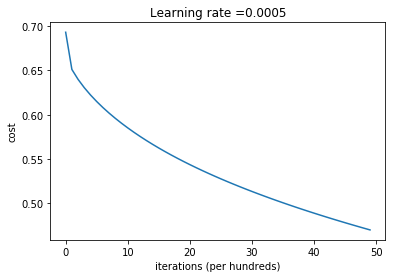

In [17]:
# Plot learning curve (with costs) for part 1
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### 5.1 - Setting parameters (part 2)
Set the `num_iterations` to 2000 and `learning_rate` to 0.005 and run the model again. Plot the cost function.

In [18]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 94.21875 %
test accuracy: 56.25 %


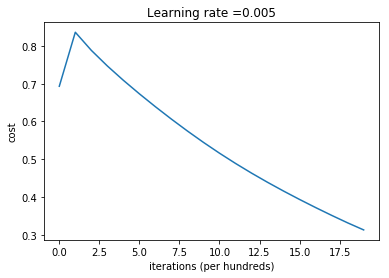

In [19]:
# Plot learning curve (with costs) for part 2
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### 5.3 - Analysis
Compare the cost function plots of part_1 and part_2. Write your observation below.

#### Write Your observation here
......
- In part 1, the learning rate is 10 times smaller and the number of iterations is more, so the cost curve is much smoother, indicating that the learning takes place slowly and we do not miss the local minimum

- In part-2, the learning rate is larger, and the accuracy is smaller . We also see the cost increases upto certain iterations, and then starts to decrease. If the learning rate is larger then the gradient descent can overshoot the minimum and as a result the accuracy is less

## For the new car_dataset.h5

#### Loading the dataset

In [20]:
def load_dataset(database_path):
    # open dataset 
    dataset_db = h5py.File(database_path, "r")
    
    
    datasets = {}
    for dataset in ["train", "dev", "test"]:
        
        # load the train set feautres (picuture)
        datasets[dataset] = {'X' : np.array(dataset_db[dataset + "_img"][:]),  # dataset features
                              'Y' : np.array(dataset_db[dataset + "_labels"][:]) # dataset labels
                            }
    return datasets


#### Reshape and flatten arrays

In [21]:
car_dataset = load_dataset('car_dataset.hdf5')

train_set_x_orig = np.array(car_dataset["train"]['X'][:])
train_set_y_orig = np.array(car_dataset["train"]['Y'][:])

dev_test_set_x_orig = np.array(car_dataset["dev"]['X'][:]) 
dev_test_set_y_orig = np.array(car_dataset["dev"]['Y'][:]) 

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
dev_test_set_y = dev_test_set_y_orig.reshape((1, dev_test_set_y_orig.shape[0]))

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
dev_test_set_x_flatten = dev_test_set_x_orig.reshape(dev_test_set_x_orig.shape[0], -1).T 

train_set_x = train_set_x_flatten/255.
dev_test_set_x = dev_test_set_x_flatten/255.

print ("train_set_x_flatten shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(dev_test_set_x.shape))
print ("test_set_y shape: " + str(dev_test_set_y.shape))

train_set_x_flatten shape: (12288, 517)
train_set_y shape: (1, 517)
test_set_x_flatten shape: (12288, 172)
test_set_y shape: (1, 172)


#### Create model for test and dev data

In [22]:
d = model(train_set_x, train_set_y, dev_test_set_x, dev_test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 97.48549323017409 %
test accuracy: 91.86046511627907 %


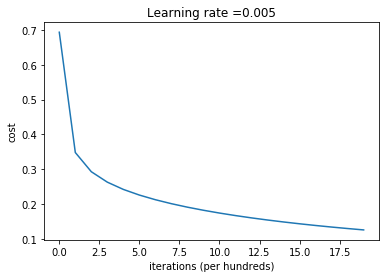

In [23]:
# Plot learning curve (with costs) 
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

#### Now for the test data 

In [24]:
test_set_x_orig = np.array(car_dataset["test"]['X'][:]) # your test set features
test_set_y_orig = np.array(car_dataset["test"]['Y'][:]) # your test set labels

test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T 
test_set_x = test_set_x_flatten/255.

In [25]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 97.48549323017409 %
test accuracy: 89.59537572254335 %


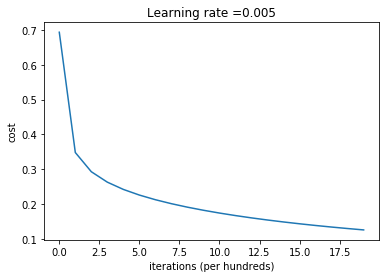

In [26]:
# Plot learning curve (with costs) 
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()